# **U.S. Census data**
In this task, I performed a clustering analysis and find patterns and connections for the U.S. Census demographic data set, defined by the census
bureau for 2017. The data set contains information like total population, eth-
nic demographic information, employment and commuting characteristics and
more. The goal is to organize data into meaningful structures and do an
exploratory analysis (e.g. child poverty rates in the U.S. and how they vary by
location and other factors).

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving acs2017_census_tract_data.csv to acs2017_census_tract_data.csv
User uploaded file "acs2017_census_tract_data.csv" with length 12997790 bytes


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import warnings; warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('acs2017_census_tract_data.csv')

In [4]:
df.describe()

,TractId,TotalPop,Men,Women,Hispanic,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.000000,73305.000000,74001.000000,72885.000000,72885.000000,73256.000000,73256.000000,73159.000000,72891.000000,73190.000000,73190.000000,73190.000000,73190.000000,73190.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,0.734047,4.753691,0.147341,3102.885961,61086.829265,9697.465747,30651.804194,4270.174225,16.118186,21.155872,35.559478,18.874446,23.427724,9.239350,12.899281,75.698005,9.308369,5.395186,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,4.554247,8.999888,1.029250,1542.245024,30516.098180,6154.669518,16126.937143,3148.049041,12.691045,18.645759,15.144984,8.137261,5.806091,6.031393,7.712496,15.292660,5.222494,11.689470,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2692.000000,728.000000,32.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,0.000000,0.200000,0.000000,2061.000000,40357.000000,5735.000000,20556.750000,2503.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.200000,5.700000,0.000000,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,0.000000,1.500000,0.000000,2905.000000,54375.000000,8267.000000,27215.500000,3404.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.300000,11.800000,79.900000,8.500000,1.000000,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,0.400000,5.000000,0.000000,3906.000000,74659.000000,11913.000000,36408.250000,4968.250000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,134017.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [5]:
df.shape

(74001, 35)

In [6]:
df.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

**Randomly check the rows with 0 TotalPop**

In [ ]:
df[df['TotalPop'] == 0].head(10)
df[df['TotalPop'] == 0].tail(10)
df[df['TotalPop'] == 0].sample()

,TractId,State,County,TotalPop,Men,Women,Hispanic,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
20347,15001990500,Hawaii,Hawaii County,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


**Drop the record with 0 TotalPop**

In [ ]:
df1 = df[df['TotalPop'] > 0]

In [ ]:
#################################################################################################################################

In [ ]:
df1.loc[df1['Income'].isnull() & df1['IncomeErr'].isnull()].shape

(420, 35)

In [ ]:
df1.loc[df1['IncomePerCap'].isnull() & df1['IncomePerCapErr'].isnull()].shape

(49, 35)

In [ ]:
df1.loc[df1['Income'].isnull() & df1['IncomeErr'].isnull()].shape

In [ ]:
# Fill the missing with median
df1['Income'] = df1['Income'].fillna(df1['Income'].median)
df1['IncomePerCap'] = df1['IncomePerCap'].fillna(df1['IncomePerCap'].median)

In [ ]:
df1.groupby(['State','County']).apply(lambda x: x.fillna(x.mean()))   # not work

TractId    State  ... FamilyWork  Unemployment
State   County                                       ...                         
Alabama Autauga County  0       1001020100  Alabama  ...        0.0           4.6
                        1       1001020200  Alabama  ...        0.0           3.4
                        2       1001020300  Alabama  ...        0.7           4.7
                        3       1001020400  Alabama  ...        0.0           6.1
                        4       1001020500  Alabama  ...        0.0           2.3
...                                    ...      ...  ...        ...           ...
Wyoming Washakie County 73051  56043000200  Wyoming  ...        0.4           4.2
                        73052  56043000301  Wyoming  ...        0.0           5.5
                        73053  56043000302  Wyoming  ...        0.0           9.4
        Weston County   73054  56045951100  Wyoming  ...        1.6           0.4
                        73055  56045951300  Wyoming  ...        0.6           3.7

[73305 rows x 35 columns]

In [ ]:
df1_pivot = df1.pivot_table(index=['State','County'], values='Poverty', aggfunc='mean')
df1_pivot

Poverty
State   County                   
Alabama Autauga County  14.100000
        Baldwin County  12.717857

In [ ]:
def cal_mean(row):
    return df1.loc[(df1['State'] == row['State'])&(df1['County'] == row['County'])]['Poverty'].mean()

In [ ]:
df1['Poverty'] = df1.fillna(df1.apply(cal_mean, axis=1))

In [ ]:
print(df1.loc[(df1['State'] == 'Alabama')&(df1['County'] == 'Autauga County')]['Poverty'].mean())

14.558333333333332


In [ ]:
for i in range(df1.shape[0]):
  if df1['Poverty'][0] == 'NaN':
    df1['Poverty'][0] = df1.loc[(df1['State'] == df1['State'][i])&(df1['County'] == df1['County'][i])]['Poverty'].mean()

In [ ]:
df_temp = df1.loc[(df1['State'] == 'Alabama')]
df_temp = df_temp.loc[(df_temp['County'] == 'Autauga County')]
df_temp['Poverty'].mean()


14.558333333333332

In [ ]:
def cal_ByStateByCounty_mean():
  df_temp = df1.loc[(df1['State'] == 'Alabama')]
  df_temp = df_temp.loc[(df_temp['County'] == 'Autauga County')]
  df_temp['Poverty'].mean()

In [ ]:
df1 = df1.fillna(df1.apply(cal_ByStateByCounty_mean(), axis=1))

TypeError: ignored

In [ ]:
# remove outliners

# https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python

In [ ]:
# df1_agg = df1.pivot_table(index='State', values= df1.columns[3:], aggfunc='sum') not work
df1_agg = df1.pivot_table(index=['State'], values=df1.columns[3:], aggfunc='sum')
df1_agg.head(5)


,Asian,Carpool,ChildPoverty,Construction,Drive,Employed,FamilyWork,Hispanic,Income,IncomeErr,...,PublicWork,SelfEmployed,Service,TotalPop,Transit,Unemployment,VotingAgeCitizen,Walk,Women,WorkAtHome
State,,,,,,,,,,,,,,,,,,,,,
Alabama,62034.237,4.261987e+05,1.246111e+06,4.812060e+05,4.151888e+06,1.114081e+08,9194.265161,1.983090e+05,5.405364e+07,9.703230e+06,...,7.596738e+05,2.523988e+05,8.286645e+05,4850771,2.013216e+04,3.762802e+05,1.916301e+08,5.989718e+04,2499965,1.458844e+05
Alaska,44741.341,9.047903e+04,1.001334e+05,9.233985e+04,4.965463e+05,2.004453e+07,1633.523000,5.019691e+04,1.223755e+07,1.722766e+06,...,1.973573e+05,4.566368e+04,1.300279e+05,738565,1.074544e+04,6.024488e+04,3.009928e+07,6.193467e+04,352246,3.372399e+04
Arizona,207289.679,7.575242e+05,1.562797e+06,6.544283e+05,5.203124e+06,1.584137e+08,11157.432805,2.103480e+06,8.790911e+07,1.394498e+07,...,9.915227e+05,4.273303e+05,1.378320e+06,6809946,1.335167e+05,5.052125e+05,2.483514e+08,1.418355e+05,3424891,4.092754e+05
Arkansas,41872.450,3.162919e+05,7.572141e+05,3.192955e+05,2.462276e+06,6.837107e+07,5398.703000,2.132540e+05,3.034169e+07,5.211519e+06,...,4.694903e+05,1.839144e+05,5.171891e+05,2977944,1.150283e+04,1.919043e+05,1.131455e+08,5.426664e+04,1516293,9.588191e+04
California,5427948.810,4.162346e+06,7.425137e+06,3.766824e+06,2.883960e+07,1.036440e+09,68659.175544,1.510585e+07,5.847974e+08,9.712329e+07,...,5.380225e+06,3.144897e+06,7.423428e+06,38982847,1.888682e+06,3.076883e+06,1.439169e+09,1.015128e+06,19616268,2.121640e+06


In [ ]:
df1_agg.shape

(52, 32)

In [ ]:
df1.columns[3:]

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [ ]:
df['State'].unique().size

In [ ]:
#################################################################################################################################

**Calculate and replace with the actual number of population**

In [ ]:
df1['Hispanic'] = df1['TotalPop']*(df1['Hispanic']/100)
df1['Native'] = df1['TotalPop']*(df1['Native']/100)
df1['Asian'] = df1['TotalPop']*(df1['Asian']/100)
df1['Pacific'] = df1['TotalPop']*(df1['Pacific']/100)
df1['VotingAgeCitizen'] = df1['TotalPop']*(df1['VotingAgeCitizen']/100)
df1['Poverty'] = df1['TotalPop']*(df1['Poverty']/100)
df1['ChildPoverty'] = df1['TotalPop']*(df1['ChildPoverty']/100)
df1['Professional'] = df1['TotalPop']*(df1['Professional']/100)
df1['Service'] = df1['TotalPop']*(df1['Service']/100)
df1['Office'] = df1['TotalPop']*(df1['Office']/100)
df1['Construction'] = df1['TotalPop']*(df1['Construction']/100)
df1['Production'] = df1['TotalPop']*(df1['Production']/100)
df1['Drive'] = df1['TotalPop']*(df1['Drive']/100)
df1['Carpool'] = df1['TotalPop']*(df1['Carpool']/100)
df1['Transit'] = df1['TotalPop']*(df1['Transit']/100)
df1['Walk'] = df1['TotalPop']*(df1['Walk']/100)
df1['OtherTransp'] = df1['TotalPop']*(df1['OtherTransp']/100)
df1['WorkAtHome'] = df1['TotalPop']*(df1['WorkAtHome']/100)
df1['MeanCommute'] = df1['TotalPop']*(df1['MeanCommute']/100)
df1['Employed'] = df1['TotalPop']*(df1['Employed']/100)
df1['PrivateWork'] = df1['TotalPop']*(df1['PrivateWork']/100)
df1['PublicWork'] = df1['TotalPop']*(df1['PublicWork']/100)
df1['SelfEmployed'] = df1['TotalPop']*(df1['SelfEmployed']/100)
df1['FamilyWork'] = df1['TotalPop']*(df1['FamilyWork']/100)
df1['Unemployment'] = df1['TotalPop']*(df1['Unemployment']/100)

**Replace missing value with mean**

In [ ]:
df1['Hispanic'] = df1['Hispanic'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Hispanic'].mean() if pd.isna(x) else x)
df1['Native'] = df1['Native'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Native'].mean() if pd.isna(x) else x)
df1['Asian'] = df1['Asian'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Asian'].mean() if pd.isna(x) else x)
df1['Pacific'] = df1['Pacific'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Pacific'].mean() if pd.isna(x) else x)
df1['Income'] = df1['Income'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Income'].mean() if pd.isna(x) else x)
df1['IncomeErr'] = df1['IncomeErr'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['IncomeErr'].mean() if pd.isna(x) else x)
df1['IncomePerCap'] = df1['IncomePerCap'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['IncomePerCap'].mean() if pd.isna(x) else x)
df1['IncomePerCapErr'] = df1['IncomePerCapErr'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['IncomePerCapErr'].mean() if pd.isna(x) else x)
df1['Poverty'] = df1['Poverty'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Poverty'].mean() if pd.isna(x) else x)
df1['ChildPoverty'] = df1['ChildPoverty'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['ChildPoverty'].mean() if pd.isna(x) else x)
df1['Professional'] = df1['Professional'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Professional'].mean() if pd.isna(x) else x)
df1['Service'] = df1['Service'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Service'].mean() if pd.isna(x) else x)
df1['Office'] = df1['Office'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Office'].mean() if pd.isna(x) else x)
df1['Construction'] = df1['Construction'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Construction'].mean() if pd.isna(x) else x)
df1['Production'] = df1['Production'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Production'].mean() if pd.isna(x) else x)
df1['Drive'] = df1['Drive'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Drive'].mean() if pd.isna(x) else x)
df1['Carpool'] = df1['Carpool'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Carpool'].mean() if pd.isna(x) else x)
df1['Transit'] = df1['Transit'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Transit'].mean() if pd.isna(x) else x)
df1['Walk'] = df1['Walk'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Walk'].mean() if pd.isna(x) else x)
df1['OtherTransp'] = df1['OtherTransp'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['OtherTransp'].mean() if pd.isna(x) else x)
df1['WorkAtHome'] = df1['WorkAtHome'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['WorkAtHome'].mean() if pd.isna(x) else x)
df1['MeanCommute'] = df1['MeanCommute'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['MeanCommute'].mean() if pd.isna(x) else x)
df1['Employed'] = df1['Employed'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Employed'].mean() if pd.isna(x) else x)
df1['PrivateWork'] = df1['PrivateWork'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['PrivateWork'].mean() if pd.isna(x) else x)
df1['PublicWork'] = df1['PublicWork'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['PublicWork'].mean() if pd.isna(x) else x)
df1['SelfEmployed'] = df1['SelfEmployed'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['SelfEmployed'].mean() if pd.isna(x) else x)
df1['FamilyWork'] = df1['FamilyWork'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['FamilyWork'].mean() if pd.isna(x) else x)
df1['Unemployment'] = df1['Unemployment'].apply(lambda x: df1.loc[(df1['State'] == df1['State'])&(df1['County'] == df1['County'])]['Unemployment'].mean() if pd.isna(x) else x)


**Check to see if there is still missing value**

In [ ]:
df1.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

**Drop TractId**

In [ ]:
df2 = df1.drop(['TractId'], axis=1)

**Visualize outliner with boxplot**

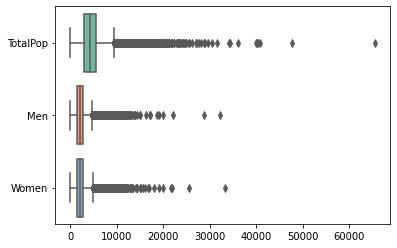

In [ ]:
sns.boxplot(data=df2[['TotalPop','Men','Women']], orient="h", palette="Set2")
plt.show()

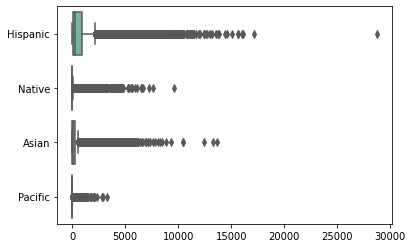

In [ ]:
sns.boxplot(data=df2[['Hispanic','Native','Asian','Pacific']], orient="h", palette="Set2")
plt.show()

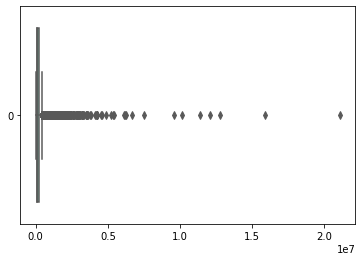

In [ ]:
sns.boxplot(data=df2['VotingAgeCitizen'], orient="h", palette="Set2")
plt.show()

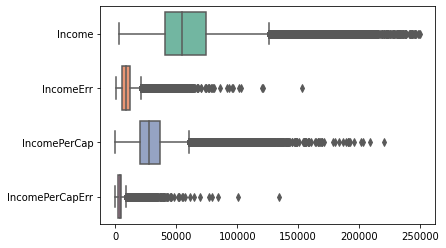

In [ ]:
sns.boxplot(data=df2[['Income','IncomeErr','IncomePerCap','IncomePerCapErr']], orient="h", palette="Set2")
plt.show()

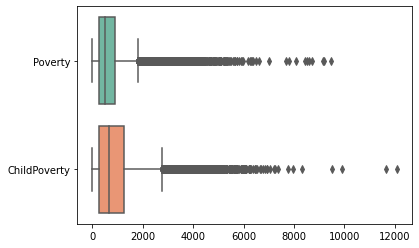

In [ ]:
sns.boxplot(data=df2[['Poverty','ChildPoverty']], orient="h", palette="Set2")
plt.show()

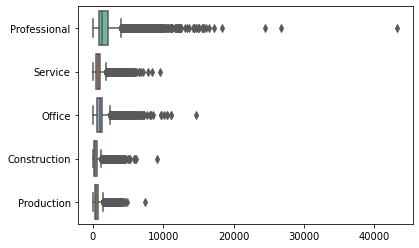

In [ ]:
sns.boxplot(data=df2[['Professional','Service','Office','Construction','Production']], orient="h", palette="Set2")
plt.show()

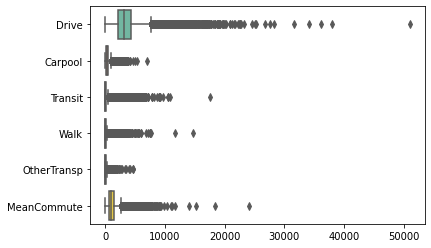

In [ ]:
sns.boxplot(data=df2[['Drive','Carpool','Transit','Walk','OtherTransp','MeanCommute']], orient="h", palette="Set2")
plt.show()

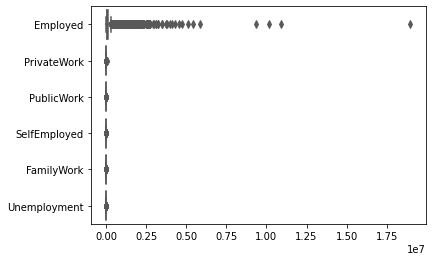

In [ ]:
sns.boxplot(data=df2[['Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment']], orient="h", palette="Set2")
plt.show()

In [ ]:
df2.shape

(73305, 34)

**Count the outliers**

In [ ]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum()

Asian                8047
Carpool              3100
ChildPoverty         2690
Construction         3035
County                  0
Drive                1691
Employed             4022
FamilyWork          17113
Hispanic             8260
Income               2944
IncomeErr            3444
IncomePerCap         3692
IncomePerCapErr      4939
MeanCommute          2323
Men                  1812
Native               9454
Office               2044
OtherTransp          4857
Pacific              9411
Poverty              3549
PrivateWork          1679
Production           2370
Professional         2690
PublicWork           3252
SelfEmployed         2846
Service              2582
State                   0
TotalPop             1681
Transit              8733
Unemployment         3402
VotingAgeCitizen     3892
Walk                 5822
Women                1670
WorkAtHome           3625
dtype: int64

In [ ]:
df2.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
def correlationMatrix(correlation_mat, t):
  plt.figure(figsize=(18,6))
  sns.heatmap(correlation_mat, annot = True)
  plt.title(t + ' Correlation Matrix', y=-0.75)
  #plt.xlabel('Demographic & Income')
  #plt.ylabel('Demographic & Income')
  plt.show()

**Income has no strong positive correlation with Ethnic group**

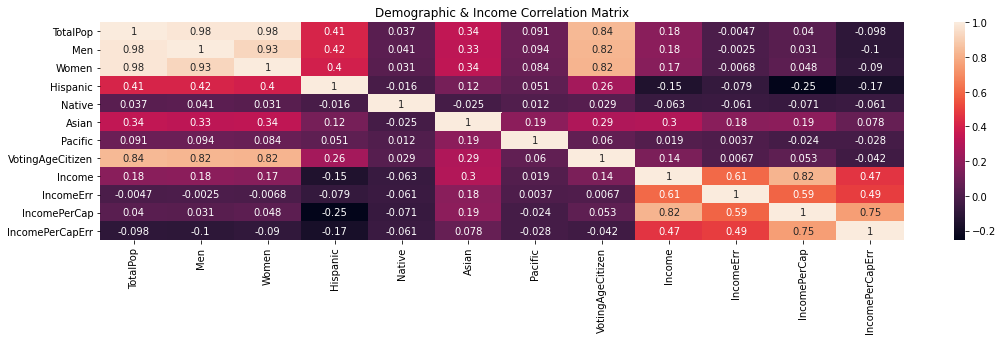

In [ ]:
df_corr = df2[['TotalPop', 'Men', 'Women', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr']].corr()

correlationMatrix(df_corr, 'Demographic & Income')

**Employment Sector has strong positive correlation with gender**

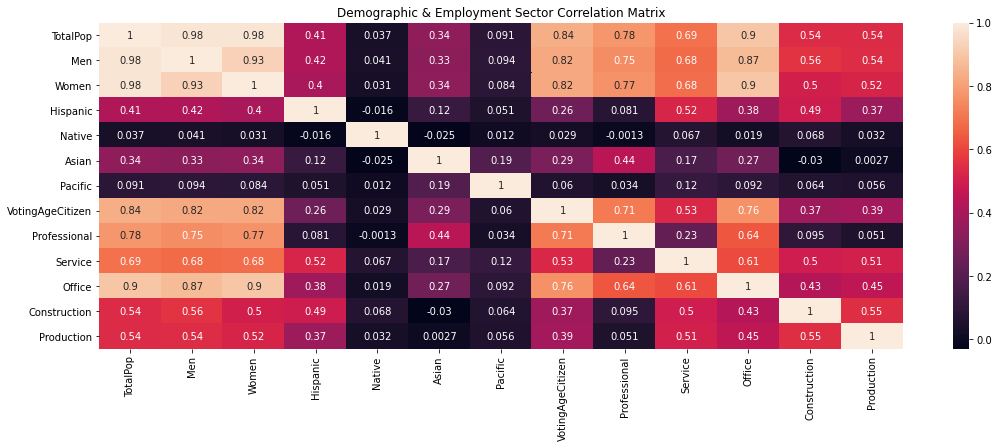

In [ ]:
df_corr = df2[['TotalPop', 'Men', 'Women', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen','Professional', 'Service', 'Office', 'Construction', 'Production']].corr()

correlationMatrix(df_corr, 'Demographic & Employment Sector')

**Transport & MeanCommute has strong positive correlation with gender**

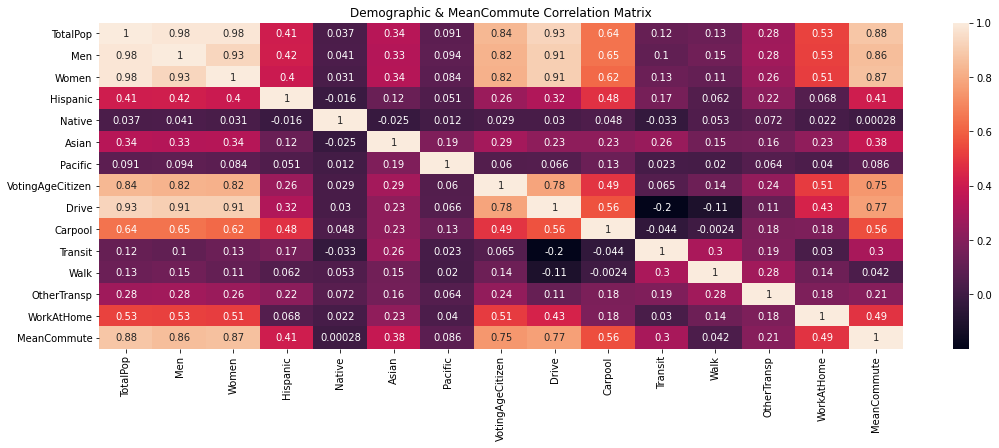

In [ ]:
df_corr = df2[['TotalPop', 'Men', 'Women', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen','Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute']].corr()
correlationMatrix(df_corr, 'Demographic & MeanCommute')

**Employment Type/status has strong positive correlation with gender while no strong correlation with ethnic group**

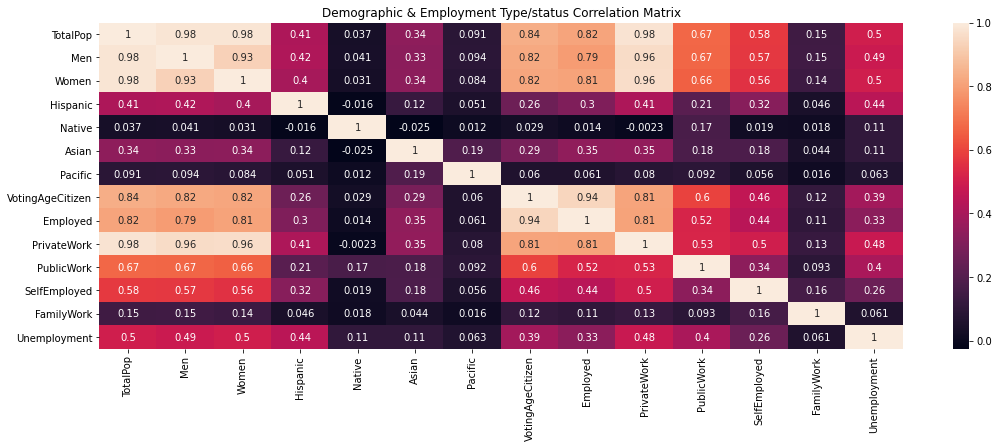

In [ ]:
df_corr = df2[['TotalPop', 'Men', 'Women', 'Hispanic', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment']].corr()

correlationMatrix(df_corr, 'Demographic & Employment Type/status')

**Income has a negative correlation with Poverty/Child Poverty**

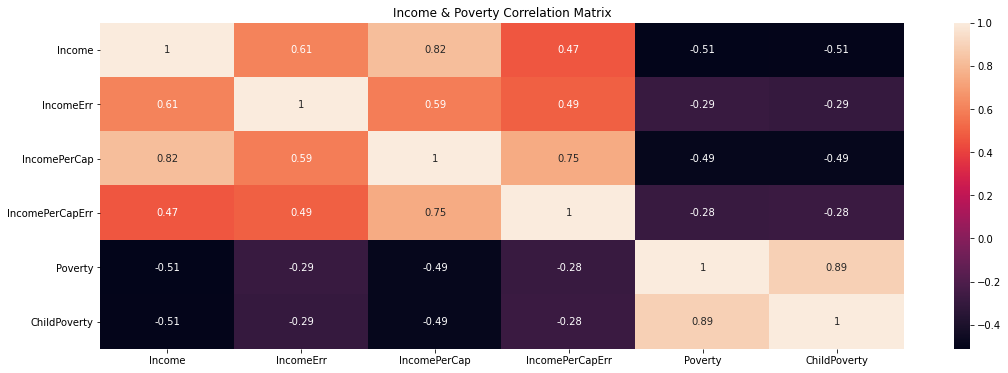

In [ ]:
df_corr = df2[['Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty']].corr()

correlationMatrix(df_corr, 'Income & Poverty')

**Income has a positive correlation with WorkAtHome**

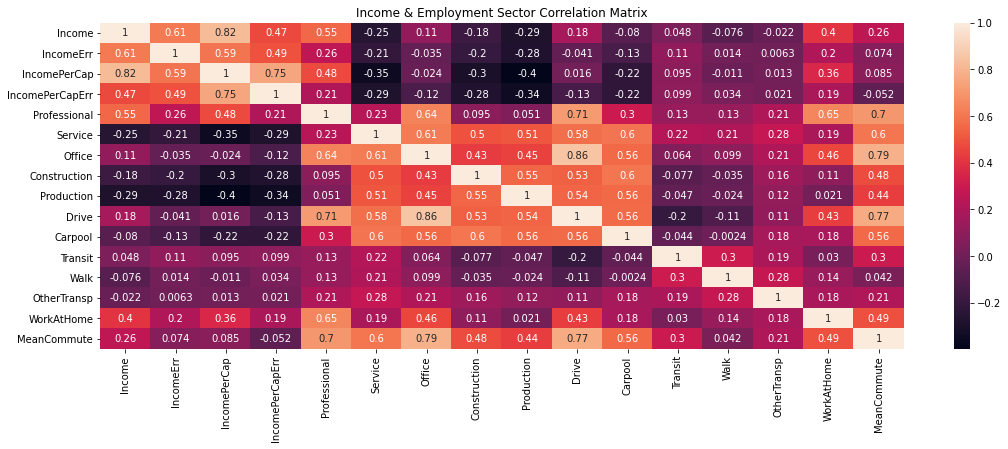

In [ ]:
df_corr = df2[['Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute']].corr()

correlationMatrix(df_corr, 'Income & Employment Sector')

**Employed has a positive correlation with Privatework**

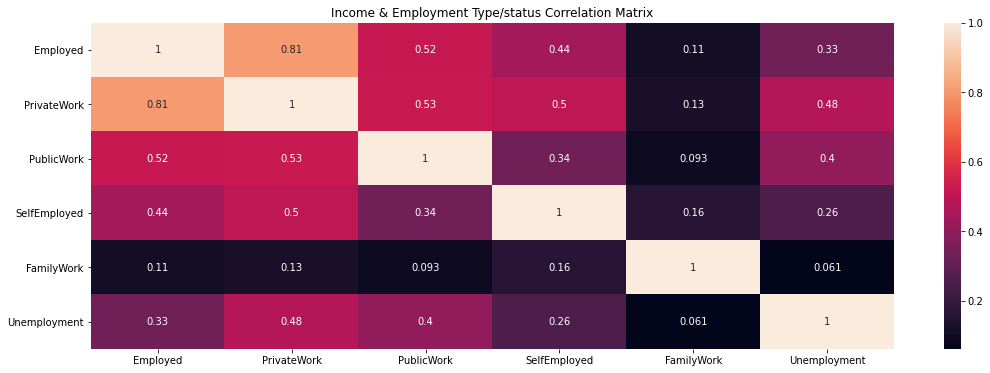

In [ ]:
df_corr = df2[[ 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment']].corr()
correlationMatrix(df_corr, 'Income & Employment Type/status')

**MeanCommute has a slightly strong positive correlation with Professional, Office and Drive**

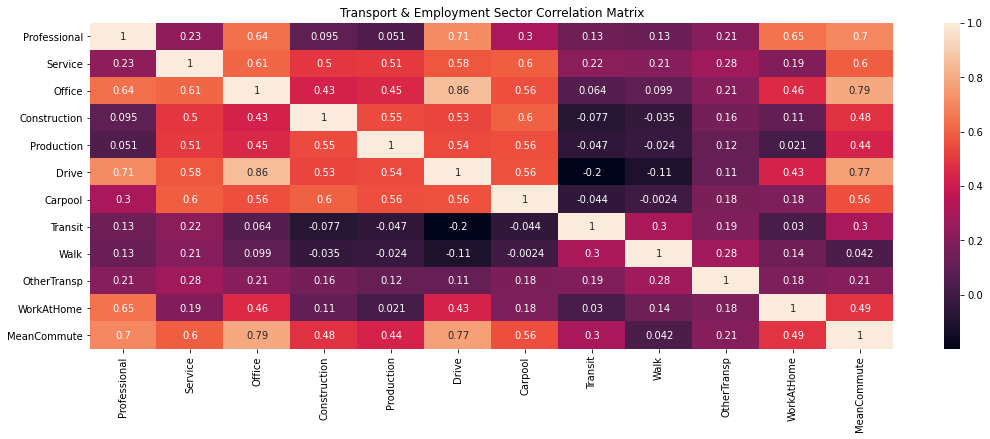

In [ ]:
df_corr = df2[['Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute']].corr()
correlationMatrix(df_corr, 'Transport & Employment Sector')

**Private work with a strong correlation with Office and Employed**




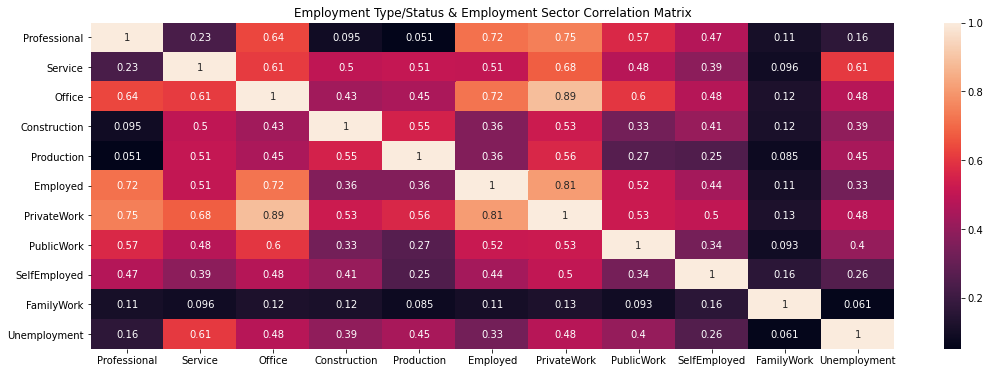

In [ ]:
df_corr = df2[['Professional', 'Service', 'Office', 'Construction', 'Production',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment']].corr()
correlationMatrix(df_corr, 'Employment Type/Status & Employment Sector')

**Private with strong correlation with Drive**

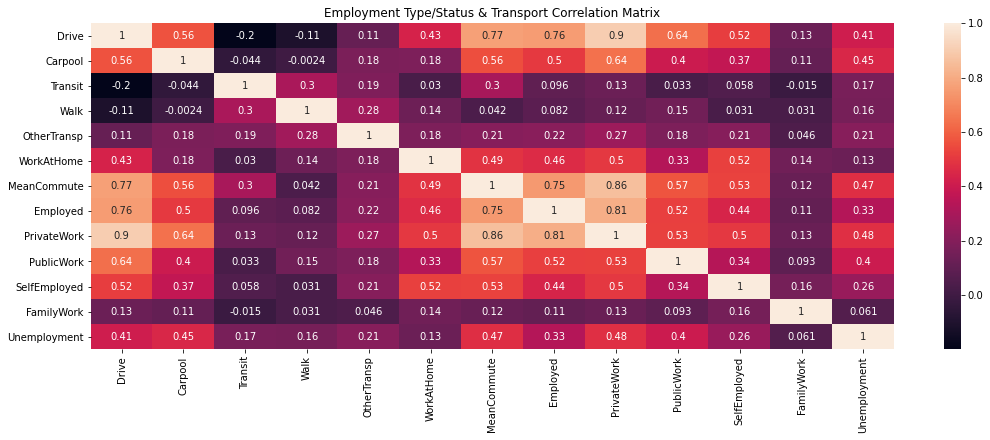

In [ ]:
df_corr = df2[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment']].corr()
correlationMatrix(df_corr, 'Employment Type/Status & Transport')

**Standardization of data**

In [ ]:
df4 = df2.drop(['State','County'], axis=1)

In [ ]:
scaler = StandardScaler()
scaler.fit(df4)
X_scale = scaler.transform(df4)
df_scale = pd.DataFrame(X_scale, columns=df4.columns)
df_scale.head()

,TotalPop,Men,Women,Hispanic,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,-1.174433,-1.156739,-1.151494,-0.601241,-0.159225,-0.414743,-0.13685,-0.597189,0.221477,0.792335,0.146773,0.643102,-0.791554,-0.582861,-0.775707,-1.038196,-1.050559,-0.602489,-0.794868,-0.875944,-1.111738,-0.408318,-0.414233,-0.678539,-0.790643,-1.002841,-0.557774,-1.201351,-0.503221,-0.915172,-0.368214,-0.918057
1,-1.025658,-0.914395,-1.099320,-0.617090,-0.159225,-0.415574,-0.13685,-0.556067,-0.650703,-0.957877,-0.723000,-0.577435,-0.306014,-0.117026,-0.817278,-0.541936,-0.921611,-0.783804,-0.538749,-0.755210,-0.680248,-0.408318,-0.448608,-0.586704,-0.974209,-0.960918,-0.545003,-1.045896,-0.642811,-0.354311,-0.368214,-0.963868
2,-0.473781,-0.583432,-0.350316,-0.425155,-0.046252,-0.411667,0.12662,-0.356859,-0.469327,-0.032828,-0.584055,-0.542799,-0.287428,-0.191950,-0.572402,-0.314680,0.136853,-0.207888,-0.561834,-0.212554,-0.406753,-0.408318,-0.322470,-0.449544,-0.733647,-0.544249,-0.365374,-0.582878,0.187026,-0.518896,0.826287,-0.609554
3,-0.072498,-0.160234,0.015785,-0.317233,-0.040550,-0.441658,-0.13685,-0.128799,-0.170625,-0.868257,-0.160271,-0.343242,-0.958275,-0.950996,-0.317920,-0.213407,0.092622,-0.053417,0.666827,0.064681,0.203928,-0.408318,-0.210101,0.367863,-0.549669,-0.094960,-0.202364,-0.164054,0.456985,-0.371592,-0.368214,-0.188966
4,2.519917,2.600501,2.354765,-0.565945,-0.159225,0.152554,-0.13685,2.280736,0.231895,0.770174,0.387881,2.045083,0.918616,1.073135,2.830791,1.094574,1.675634,-0.168212,1.886136,2.794595,2.217330,-0.408318,-0.151541,-0.425739,-0.643724,1.277712,2.056465,1.993858,3.791770,0.907234,-0.368214,-0.318195


**Reduce the number of features with PCA**

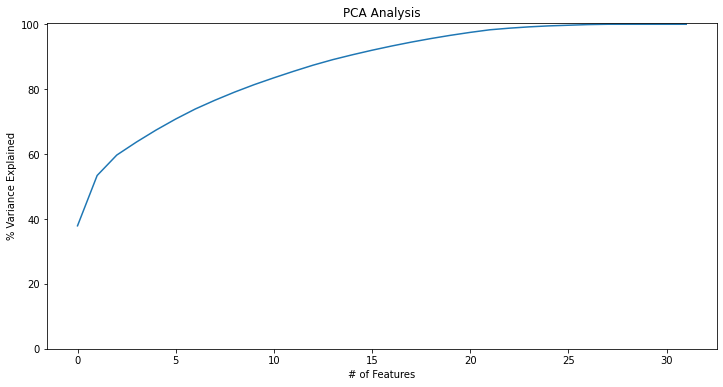

In [ ]:
pca = PCA(n_components=32)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.show()

In [ ]:
pca = PCA(n_components=18)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_scale.shape

(73305, 18)

**Clustering with DBSCAN**

DBSCAN labels without PCA:  {0, 1, 2, 3, 4, -1}
Silhouette Score of DBSCAN without PCA:  -0.23210380361668276
DBSCAN labels with PCA:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}
Silhouette Score of DBSCAN with PCA:  -0.3721379231999963
Estimated number of clusters under DBSCAN without PCA: 5
Estimated number of noise points under DBSCAN without PCA: 73238
Estimated number of clusters under DBSCAN with PCA: 10
Estimated number of noise points under DBSCAN with PCA: 73131


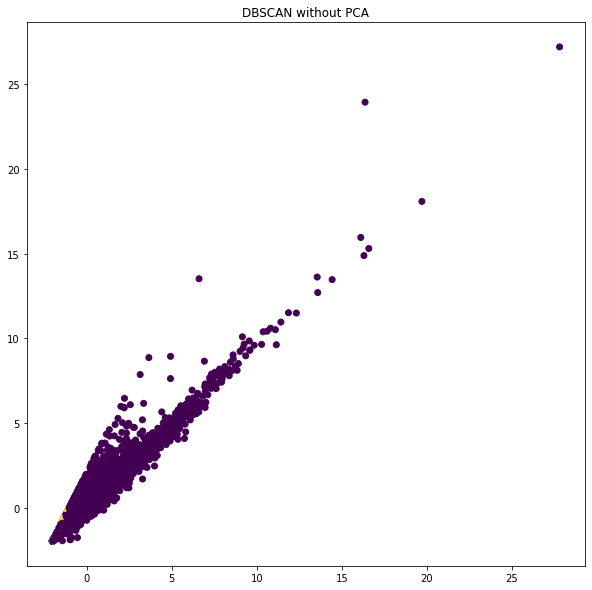

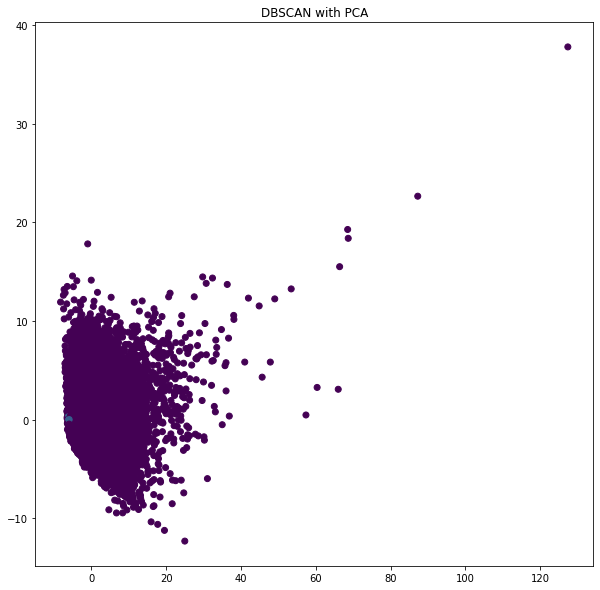

In [ ]:
dbscan1 = DBSCAN()
dbscan1.fit(df_scale)
print("DBSCAN labels without PCA: ", set(dbscan1.labels_))
print("Silhouette Score of DBSCAN without PCA: ", silhouette_score(df_scale, dbscan1.labels_, metric = 'euclidean'))

dbscan2 = DBSCAN()
dbscan2.fit(pca_scale)
print("DBSCAN labels with PCA: ", set(dbscan2.labels_))
print("Silhouette Score of DBSCAN with PCA: ", silhouette_score(pca_scale, dbscan2.labels_, metric = 'euclidean'))


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan1.labels_)) - (1 if -1 in dbscan1.labels_ else 0)
n_noise_ = list(dbscan1.labels_).count(-1)
print('Estimated number of clusters under DBSCAN without PCA: %d' % n_clusters_)
print('Estimated number of noise points under DBSCAN without PCA: %d' % n_noise_)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan2.labels_)) - (1 if -1 in dbscan2.labels_ else 0)
n_noise_ = list(dbscan2.labels_).count(-1)
print('Estimated number of clusters under DBSCAN with PCA: %d' % n_clusters_)
print('Estimated number of noise points under DBSCAN with PCA: %d' % n_noise_)


y_pred1 = dbscan1.fit_predict(df_scale)
plt.figure(figsize=(10,10))
plt.scatter(df_scale.to_numpy()[:,0], df_scale.to_numpy()[:,1],c=y_pred1, cmap='viridis')
plt.title("DBSCAN without PCA")
plt.show()

y_pred2 = dbscan2.fit_predict(pca_scale)
plt.figure(figsize=(10,10))
plt.scatter(pca_scale[:,0], pca_scale[:,1],c=y_pred2, cmap='viridis')
plt.title("DBSCAN with PCA")
plt.show()

**Elbow Method to find the optimal no. of cluster for Kmeans**

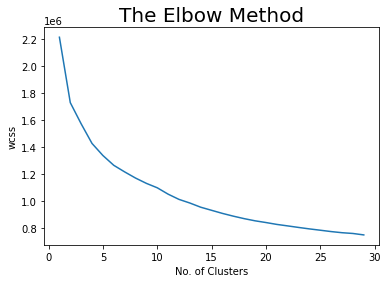

In [ ]:
wcss = []

for i in range(1, 30):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(pca_scale)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Clustering with Kmeans**

Kmeans labels without PCA:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Silhouette Score of Kmeans without PCA:  0.13229827958672227
Kmeans labels with PCA:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Silhouette Score of Kmeans with PCA:  0.12504963100493355


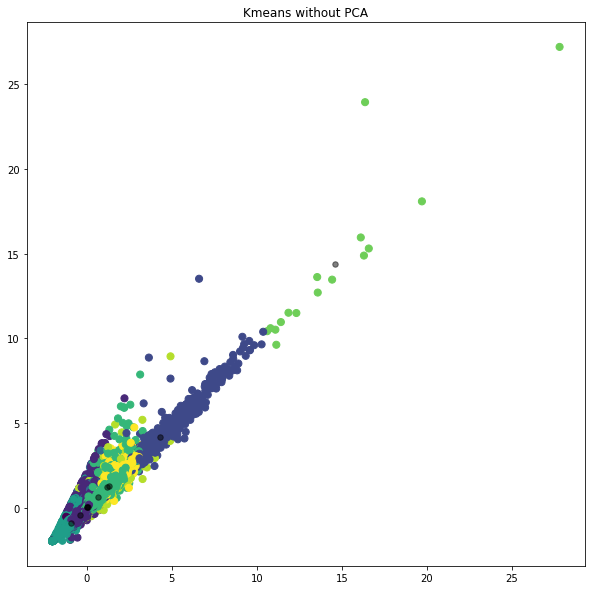

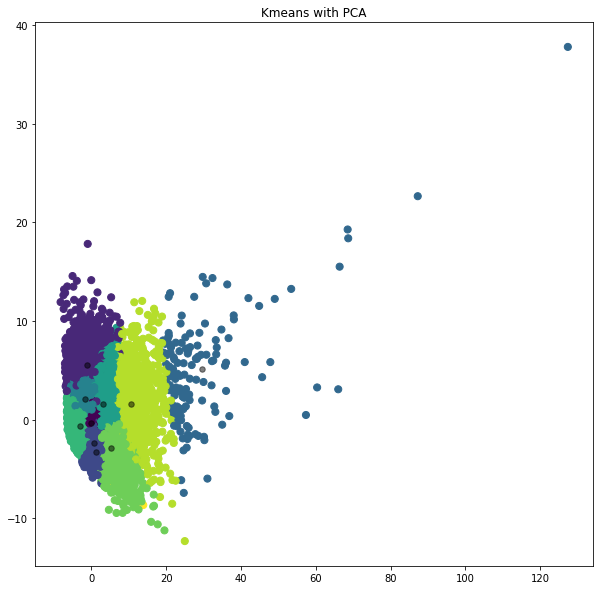

In [ ]:
kmeans1 = KMeans(n_clusters=10, random_state=0).fit(df_scale)
print("Kmeans labels without PCA: ", set(kmeans1.labels_))
print("Silhouette Score of Kmeans without PCA: ", silhouette_score(df_scale, kmeans1.labels_, metric = 'euclidean'))

kmeans2 = KMeans(n_clusters=10, random_state=0).fit(pca_scale)
print("Kmeans labels with PCA: ", set(kmeans2.labels_))
print("Silhouette Score of Kmeans with PCA: ", silhouette_score(pca_scale, kmeans2.labels_, metric = 'euclidean'))


y_kmeans1 = kmeans1.predict(df_scale)
y_kmeans2 = kmeans2.predict(pca_scale)


plt.figure(figsize=(10,10))
plt.scatter(df_scale.to_numpy()[:, 0], df_scale.to_numpy()[:, 1], c=y_kmeans1, s=50, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.5);
plt.title("Kmeans without PCA")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(pca_scale[:, 0], pca_scale[:, 1], c=y_kmeans2, s=50, cmap='viridis')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.5);
plt.title("Kmeans with PCA")
plt.show()

In [ ]:
df_final = df1
df_final['Cluster_Label']= dbscan2.labels_
df_temp = df_final.pivot_table(index=['Cluster_Label'], values='TractId', aggfunc='count')
df_temp.rename(columns={'TractId': 'Count of record per Cluster'})

,Count of record per Cluster
Cluster_Label,
-1,73131
0,10
1,35
2,39
3,38
4,26
5,5
6,6
7,5


In [ ]:
df_final.groupby('Cluster_Label').agg({'TotalPop':'mean','Men':'mean','Women':'mean','Hispanic':'mean','Native':'mean',
                                       'Asian':'mean','Pacific':'mean','VotingAgeCitizen':'mean'})

,TotalPop,Men,Women,Hispanic,Native,Asian,Pacific,VotingAgeCitizen
Cluster_Label,,,,,,,,
-1,4433.668157,2181.363457,2252.304700,819.490298,28.680756,232.328051,7.049059,170402.147606
0,5.900000,2.800000,3.100000,0.100000,1.200000,0.000000,0.000000,0.431000
1,1911.628571,1850.200000,61.428571,213.959914,12.647943,7.322343,0.501543,46879.934000
2,28.692308,14.641026,14.051282,9.950077,0.333282,0.282051,0.000000,26.113590
3,1801.736842,879.710526,922.026316,72.387158,2.827842,20.853395,0.457711,26087.620789
4,1819.076923,891.461538,927.615385,59.517885,6.172154,9.722500,0.000000,25950.456923
5,1640.600000,840.000000,800.600000,41.725000,11.580600,2.904000,0.000000,21861.038000
6,2607.000000,1268.666667,1338.333333,50.220333,5.570000,22.778167,0.000000,52652.943333
7,1689.800000,875.200000,814.600000,26.973400,4.445800,4.726800,0.000000,23049.790000


In [ ]:
df_final.groupby('Cluster_Label').agg({'Income':'mean','IncomeErr':'mean','IncomePerCap':'mean','IncomePerCapErr':'mean','Poverty':'mean','ChildPoverty':'mean'})

,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty
Cluster_Label,,,,,,
-1,61096.425738,9701.680840,30670.394561,4273.517923,669.772545,877.388129
0,61086.829265,9697.465747,30651.804194,4270.174225,2.766800,876.509113
1,61086.829265,9697.465747,3674.657143,1282.000000,665.072347,876.509113
2,61086.829265,9697.465747,29095.172672,4346.655774,8.435077,610.275232
3,61171.763158,7396.473684,29489.552632,2931.368421,141.219395,202.001632
4,45504.923077,5841.884615,23309.807692,2607.846154,230.891308,317.739077
5,53379.600000,6355.600000,28530.000000,3060.200000,152.511200,162.927400
6,45371.666667,6306.333333,22475.833333,2137.000000,352.218667,459.622000
7,51021.400000,3870.200000,28265.800000,2610.200000,209.779200,401.951600


In [ ]:
df_final.groupby('Cluster_Label').agg({'Professional':'mean','Service':'mean','Office':'mean','Construction':'mean','Production':'mean'})

,Professional,Service,Office,Construction,Production
Cluster_Label,,,,,
-1,1605.612540,818.170708,1047.060607,407.138132,557.457589
0,1603.489950,817.123434,1045.773362,406.687750,556.845568
1,1603.489950,817.123434,1045.773362,406.687750,556.845568
2,8.014282,8.015718,5.556179,2.958385,4.146615
3,591.764026,293.754053,469.928184,182.120342,263.771000
4,521.311846,321.915077,407.914385,239.466654,328.576115
5,564.020400,210.742400,367.194000,268.765000,229.914800
6,708.586833,489.572000,634.054833,327.867000,447.687667
7,522.955800,337.873800,473.736800,157.712800,197.864800


In [ ]:
df_final.groupby('Cluster_Label').agg({'Drive':'mean','Carpool':'mean','Transit':'mean','Walk':'mean','OtherTransp':'mean','WorkAtHome':'mean','MeanCommute':'mean'})

,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute
Cluster_Label,,,,,,,
-1,3393.761227,413.822179,220.495655,120.568195,80.369809,205.917435,1174.354870
0,3389.771730,413.266070,220.125852,120.386895,80.241087,205.624486,1173.466772
1,3389.771730,413.266070,220.125852,120.386895,80.241087,205.624486,1173.466772
2,14.558128,2.459359,5.785744,2.502026,0.400744,2.982026,1145.975931
3,1609.117947,109.906605,14.977921,16.127421,12.622632,39.053079,456.325763
4,1579.724538,162.957500,6.063308,17.045077,9.149308,44.330077,478.592000
5,1271.496000,146.381400,5.297600,45.398600,11.245600,160.730000,358.623800
6,2198.767833,272.743667,14.134167,36.260833,10.952167,75.014167,595.655833
7,1448.026200,100.355200,51.560800,33.487400,7.151400,48.890000,365.784200


In [ ]:
df_final.groupby('Cluster_Label').agg({'Employed':'mean','PrivateWork':'mean','PublicWork':'mean','SelfEmployed':'mean','FamilyWork':'mean','Unemployment':'mean'})

,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Cluster_Label,,,,,,
-1,114816.247888,3533.754386,627.508455,266.864168,7.316112,306.161178
0,0.000000,3529.407916,626.690664,266.520752,7.304161,305.751592
1,0.000000,3529.407916,626.690664,266.520752,7.304161,305.751592
2,12.690769,24.840769,2.130231,1.721308,0.000000,2.292308
3,16992.328421,1512.710947,220.697921,68.102158,0.101105,89.364053
4,14470.953462,1467.290808,246.469692,105.094615,0.000000,120.963538
5,13639.328000,1187.313000,211.717200,231.781000,9.450200,59.187000
6,30969.995000,2166.111333,296.588667,144.352167,0.000000,208.573500
7,14717.000000,1455.085400,142.598400,92.116200,0.000000,77.570000
